In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # 데이터 스플릿용
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀분석모델 사용
from sklearn.metrics import accuracy_score # Accuracy 측정하려고
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [23]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
# 1이 생존, 0이 사망
df.info()
df['Embarked'].value_counts()
df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2}) # Sex 열 > 0,1로 매핑

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Age, Cabin, Embarked는 NaN 있음, 나머지는 결측 없음

In [25]:
# PassengerId, Name, Ticket, Cabin, Embarked 의미 없음, Survived가 y, 나머지가 X
df = df.drop(columns= ['PassengerId','Name', 'Ticket', 'Cabin'])
df['Sex'] = df['Sex'].map({'male':0,'female':1}) # Sex 열 > 0,1로 매핑
df.info()

y = df['Survived']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [26]:
corr = df.corr()['Survived'].abs().sort_values(ascending=False) # corr에다가 Survived와 상관계수의 절대값이 높은 순서대로(내림차순) 정렬
print(corr) # 각각의 상관계수 확인
best = corr.index[1:] # 0은 Survived니까 빼고
best

Survived    1.000000
Sex         0.543351
Pclass      0.338481
Fare        0.257307
Embarked    0.108669
Parch       0.081629
Age         0.077221
SibSp       0.035322
Name: Survived, dtype: float64


Index(['Sex', 'Pclass', 'Fare', 'Embarked', 'Parch', 'Age', 'SibSp'], dtype='object')

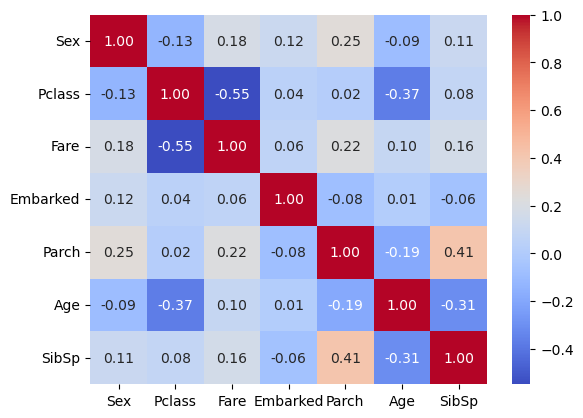

In [27]:
# feature 끼리의 상관관계 확인
repeat_reduce = df[best].corr()

sns.heatmap(repeat_reduce, annot=True, fmt=".2f", cmap="coolwarm") # Heatmap 은 seaborn에서 된다

# annot=True → 셀 안에 숫자 값(상관계수) 표시
# fmt=".2f" → 숫자 값을 소수점 둘째 자리까지 표시
# cmap="coolwarm" → 색상 테마(파란색=음의 상관관계, 빨간색=양의 상관관계)

plt.show()

In [28]:
# 중복은 없는듯, NaN값 있는지 확인
X = df[best]
print(X, X.isnull().sum())

     Sex  Pclass     Fare  Embarked  Parch   Age  SibSp
0      0       3   7.2500       0.0      0  22.0      1
1      1       1  71.2833       1.0      0  38.0      1
2      1       3   7.9250       0.0      0  26.0      0
3      1       1  53.1000       0.0      0  35.0      1
4      0       3   8.0500       0.0      0  35.0      0
..   ...     ...      ...       ...    ...   ...    ...
886    0       2  13.0000       0.0      0  27.0      0
887    1       1  30.0000       0.0      0  19.0      0
888    1       3  23.4500       0.0      2   NaN      1
889    0       1  30.0000       1.0      0  26.0      0
890    0       3   7.7500       2.0      0  32.0      0

[891 rows x 7 columns] Sex           0
Pclass        0
Fare          0
Embarked      2
Parch         0
Age         177
SibSp         0
dtype: int64


In [ ]:
X = X.copy()

# NaN 처리
mean_age = X['Age'].mean()
X['Age'] = X['Age'].fillna(mean_age)

most_common = X['Embarked'].mode()[0]
X['Embarked'] = X['Embarked'].fillna(most_common)

X.isnull().sum()

Sex         0
Pclass      0
Fare        0
Embarked    0
Parch       0
Age         0
SibSp       0
dtype: int64

In [30]:
# X, y 분할
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
S_model = LogisticRegression()
S_model.fit(train_X, train_y)

# 테스트 및 정확도확인
predict_y = S_model.predict(test_X)
accuracy = accuracy_score(test_y, predict_y)
print(f"\n\n\nLogistic Regression Model's Accuracy : {accuracy:.4f}\n\n\n")




Logistic Regression Model's Accuracy : 0.7989





c:\Users\302-1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


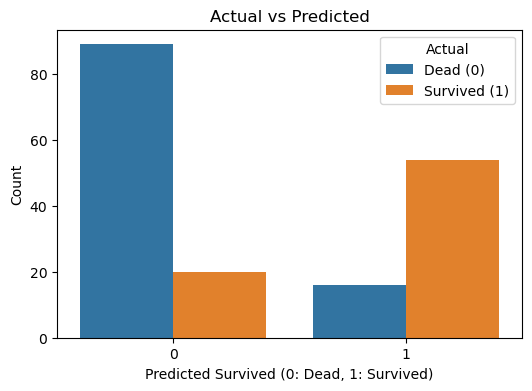

Accuracy : 0.7989


In [31]:
# 예측 결과 DataFrame 생성
df_results = pd.DataFrame({'Actual': test_y, 'Predicted': predict_y})

# countplot 시각화
plt.figure(figsize=(6, 4))
sns.countplot(x='Predicted', hue='Actual', data=df_results)
plt.title('Actual vs Predicted')
plt.xlabel('Predicted Survived (0: Dead, 1: Survived)')
plt.ylabel('Count')
plt.legend(title="Actual", labels=["Dead (0)", "Survived (1)"])
plt.show()
print(f"Accuracy : {accuracy:.4f}")

In [ ]:
# 평가
pred_y = S_model.predict(test_X)
acc = accuracy_score(test_y, pred_y)

# 출력
print(f"\n✅ Logistic Regression 정확도: {acc:.4f}")
print("\n📊 Classification Report:")
print(classification_report(test_y, pred_y))

# 11. 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

In [32]:
# 실제 test 데이터 준비 (PassengerId 필요)
# test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df = pd.read_csv('test.csv')
test_ids = test_df['PassengerId']

# 전처리 (학습 때와 동일하게)
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_df['Age'] = test_df['Age'].fillna(X['Age'].mean())  # 학습 데이터 기준 평균 사용
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

# 사용한 피처만 선택 (X.columns 그대로 사용)
test_X = test_df[X.columns]

# 예측
submission_preds = S_model.predict(test_X)

# 제출 파일 생성
submission = pd.DataFrame({
    'PassengerId': test_ids,
    'Survived': submission_preds
})
# submission.to_csv('/kaggle/working/submission.csv', index=False)
submission.to_csv('submission.csv', index=False)
print("submission.csv 저장 완료!")

submission.csv 저장 완료!
